In [1]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

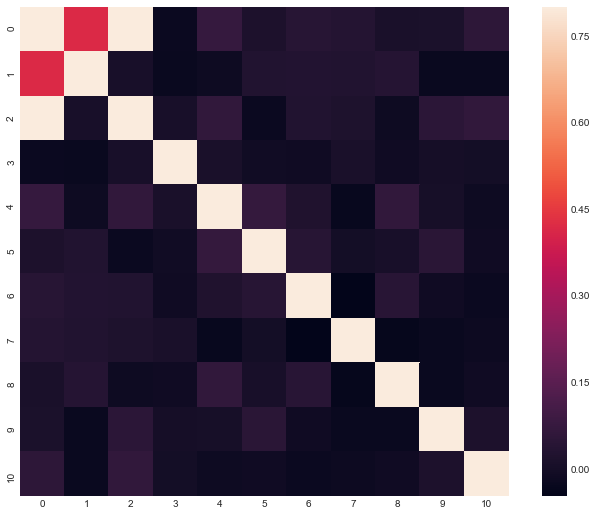

In [2]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5



# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

R-squared regression: 0.8246171672743836
R-squared PLSR: 0.8246167701754867


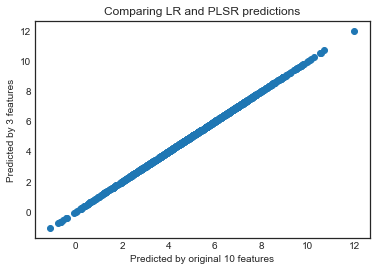

In [5]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
sns.set_style('white')
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

In [18]:
#modified y to 
y = X[:, 0] + 3 * X[:, 1] + np.random.normal(size=n * 1) + 5

In [40]:
X[:,1]

array([-3.94716533e-01,  1.59820206e+00,  2.03939047e-01,  7.31740595e-01,
        6.54900042e-01,  7.30449154e-01, -4.13501593e-01, -1.80415243e+00,
        1.74171313e+00, -9.56813304e-01, -5.40220094e-01,  7.33291634e-02,
        6.41853034e-01,  2.66122473e-01, -2.67922248e+00, -7.75271557e-01,
       -1.37949734e+00, -1.23678519e+00, -9.25247873e-02, -3.39824644e-01,
       -2.66671431e-01, -6.22410101e-01,  1.26315808e+00, -1.35230817e+00,
       -8.96967253e-02, -2.07748902e-01, -3.29465652e-01,  5.29613039e-01,
       -8.26993238e-01,  5.16589280e-01, -7.08780486e-01,  1.41231868e+00,
       -1.21062714e+00, -1.75249735e+00, -4.71457107e-01, -3.65510411e-01,
        1.16888912e+00,  1.35852834e+00, -5.49666347e-01,  7.81597504e-02,
       -3.36057064e-01, -4.45961627e-01,  1.21404359e-01, -1.08984235e+00,
        1.86732155e-01,  1.51897196e-02, -1.34592732e+00, -1.74737612e+00,
        1.78576376e-01, -5.52918592e-01,  7.71420879e-01, -6.38058320e-01,
       -8.25368037e-01,  

R-squared regression: 0.9127771061761506
R-squared PLSR: 0.9127767213891508


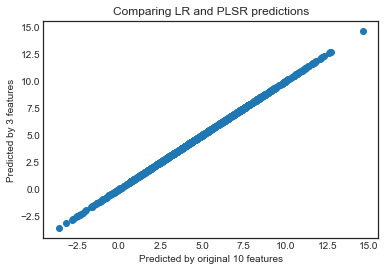

In [8]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
sns.set_style('white')
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()